In [63]:
!pip install -U vnstock

In [64]:
from vnstock import *

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [66]:
# Lấy dữ liệu lịch sử cổ phiếu
df = stock_historical_data(symbol="HPG", start_date="2023-01-21", end_date="2024-04-05", resolution="1D", type="stock", beautify=True, decor=False, source='DNSE')
df

,time,open,high,low,close,volume,ticker
0,2023-01-27,21000,21550,20850,21500,26524400,HPG
1,2023-01-30,21700,22200,21350,21750,42341300,HPG
2,2023-01-31,21900,22100,21700,22100,28105900,HPG
3,2023-02-01,22200,22650,21000,21100,51905400,HPG
4,2023-02-02,21200,21700,21100,21300,25388600,HPG
...,...,...,...,...,...,...,...
295,2024-04-01,30200,30350,29950,30100,20759400,HPG
296,2024-04-02,29900,30400,29800,30400,26298400,HPG
297,2024-04-03,30350,30450,29950,29950,21489800,HPG
298,2024-04-04,29950,30050,29550,29600,26371300,HPG


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    300 non-null    object
 1   open    300 non-null    int64 
 2   high    300 non-null    int64 
 3   low     300 non-null    int64 
 4   close   300 non-null    int64 
 5   volume  300 non-null    int64 
 6   ticker  300 non-null    object
dtypes: int64(5), object(2)
memory usage: 16.5+ KB


In [68]:
df.describe()

,open,high,low,close,volume
count,300.000000,300.000000,300.000000,300.000000,3.000000e+02
mean,25424.500000,25731.333333,25110.166667,25412.666667,2.378404e+07
std,3255.195192,3274.549915,3248.427194,3260.210032,1.097090e+07
min,19750.000000,20400.000000,19700.000000,19750.000000,6.219900e+06
25%,21787.500000,22037.500000,21587.500000,21737.500000,1.622465e+07
50%,26475.000000,26875.000000,26125.000000,26500.000000,2.115165e+07
75%,27900.000000,28100.000000,27600.000000,27800.000000,2.933468e+07
max,31200.000000,31400.000000,30700.000000,31150.000000,8.684150e+07


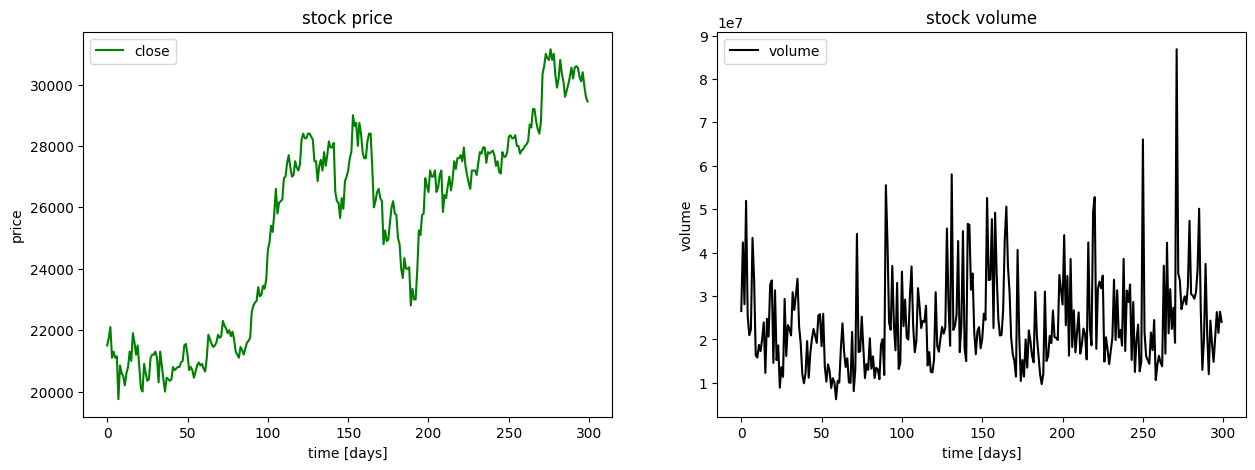

In [69]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df.close.values, color='green', label='close')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df.volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

In [70]:
df = df.set_index('time', drop=False)

In [71]:
# Tạo biểu đồ Candlestick và Volume cho mã 'FPT' sử dụng `plotly`
import plotly.subplots as ms
import plotly.graph_objects as go

fig = ms.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02)

fig.add_trace(go.Candlestick(x=df.index,
                             open=df['open'],
                             high=df['high'],
                             low=df['low'],
                             close=df['close'],
                             name='Candlestick'),
              row=1, col=1)

# Thêm biểu đồ cột thể hiện khối lượng giao dịch
fig.add_trace(go.Bar(x=df.index, y=df['volume'], name='Volume'),
              row=2, col=1)

# Cập nhật bố cục của biểu đồ, bao gồm tiêu đề, tiêu đề trục y, ẩn thanh trượt x, khoảng cách giữa các cột, và đặt phạm vi thời gian cho trục x.
fig.update_layout(title='HPG CandleStick Chart',
                  yaxis_title='HPG',
                  xaxis_rangeslider_visible=False,
                  bargap=0,
                  xaxis_range=['2023-01-21', '2024-04-05'])

# Hiển thị biểu đồ
fig.show()

In [72]:
df.head()

,time,open,high,low,close,volume,ticker
time,,,,,,,
2023-01-27,2023-01-27,21000,21550,20850,21500,26524400,HPG
2023-01-30,2023-01-30,21700,22200,21350,21750,42341300,HPG
2023-01-31,2023-01-31,21900,22100,21700,22100,28105900,HPG
2023-02-01,2023-02-01,22200,22650,21000,21100,51905400,HPG
2023-02-02,2023-02-02,21200,21700,21100,21300,25388600,HPG


In [73]:
df_shifted = df['close'].shift()
df['prev_closed'] = df_shifted
df.head()

,time,open,high,low,close,volume,ticker,prev_closed
time,,,,,,,,
2023-01-27,2023-01-27,21000,21550,20850,21500,26524400,HPG,NaN
2023-01-30,2023-01-30,21700,22200,21350,21750,42341300,HPG,21500.0
2023-01-31,2023-01-31,21900,22100,21700,22100,28105900,HPG,21750.0
2023-02-01,2023-02-01,22200,22650,21000,21100,51905400,HPG,22100.0
2023-02-02,2023-02-02,21200,21700,21100,21300,25388600,HPG,21100.0


In [74]:
df.dropna(inplace=True)
df

,time,open,high,low,close,volume,ticker,prev_closed
time,,,,,,,,
2023-01-30,2023-01-30,21700,22200,21350,21750,42341300,HPG,21500.0
2023-01-31,2023-01-31,21900,22100,21700,22100,28105900,HPG,21750.0
2023-02-01,2023-02-01,22200,22650,21000,21100,51905400,HPG,22100.0
2023-02-02,2023-02-02,21200,21700,21100,21300,25388600,HPG,21100.0
2023-02-03,2023-02-03,21450,21550,21000,21100,20956300,HPG,21300.0
...,...,...,...,...,...,...,...,...
2024-04-01,2024-04-01,30200,30350,29950,30100,20759400,HPG,30250.0
2024-04-02,2024-04-02,29900,30400,29800,30400,26298400,HPG,30100.0
2024-04-03,2024-04-03,30350,30450,29950,29950,21489800,HPG,30400.0


<Axes: xlabel='time'>

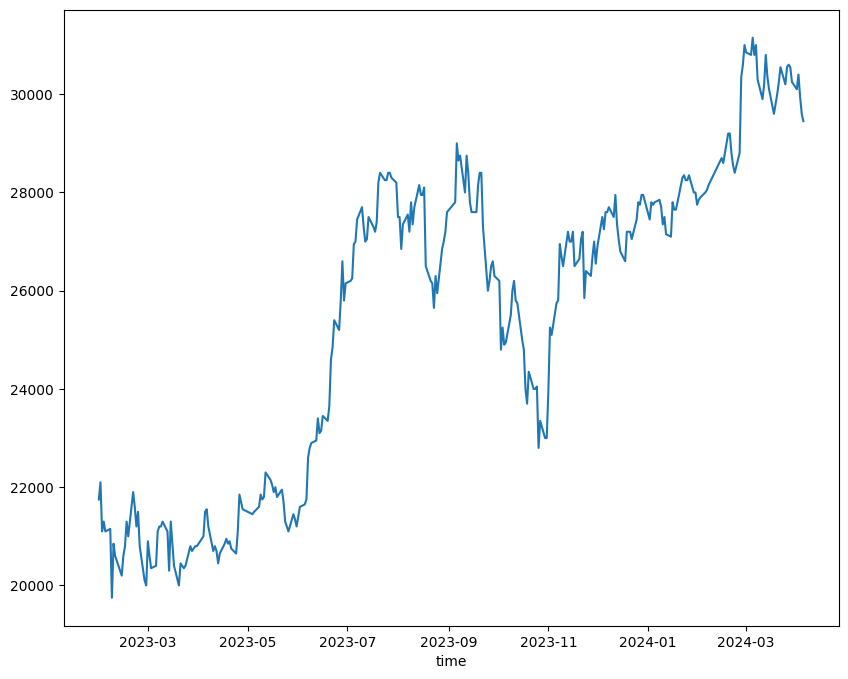

In [75]:
df['close'].plot(figsize=(10,8))

In [76]:
x = df[['open', 'prev_closed']]
y = df['close']

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [78]:
regressor = LinearRegression()

In [79]:
regressor.fit(x_train, y_train)

LinearRegression()

In [80]:
print("Weight: ",regressor.coef_)
print("Bias: ",regressor.intercept_)

Weight:  [0.81487812 0.18141569]
Bias:  68.41618299528636


In [81]:
prediction = regressor.predict(x_test)

In [82]:
prediction

array([26904.85354142, 23825.56276332, 20592.06865249, 27729.10094161,
       27765.38407872, 27357.79577077, 27086.11998084, 26144.25087731,
       20872.8152267 , 26130.57007782, 27855.94267537, 20990.58617617,
       23680.57946101, 27806.12798491, 19994.29236697, 21995.95076965,
       28363.16036424, 22666.14408325, 27167.6077932 , 27964.64284056,
       23331.87662779, 25297.25189335, 28213.71629286, 27385.0081236 ,
       27665.7546978 , 27099.65153419, 25347.06658381, 29477.22512292,
       30165.56000508, 27928.35970345, 23046.52003838, 21316.68667176,
       20963.37382334, 28403.90427043, 27217.42248366, 27330.58341793,
       25636.8839423 , 24776.50265113, 29436.48121673, 21090.21555709,
       28702.79241318, 21941.52606398, 21271.33275038, 21004.11772952,
       20601.13943677, 27914.8281501 , 27914.8281501 , 21687.99184261,
       19745.21891467, 20995.04694524, 22095.58015057, 30790.3993973 ,
       25347.06658381, 25691.30864796, 20809.46898289, 27099.65153419,
      

In [83]:
data = pd.DataFrame({'Thực tế': y_test, 'Dự đoán': prediction})

In [84]:
regressor.score(x_test, y_test)

0.9839701996705635

In [85]:
# Tính mse và rmse
import math
print('Mean Squared Error:', metrics.mean_squared_error(y_test,prediction))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,prediction)))

Mean Squared Error: 172918.41470519986
Root Mean Squared Error: 415.8346001780033


<Axes: xlabel='time'>

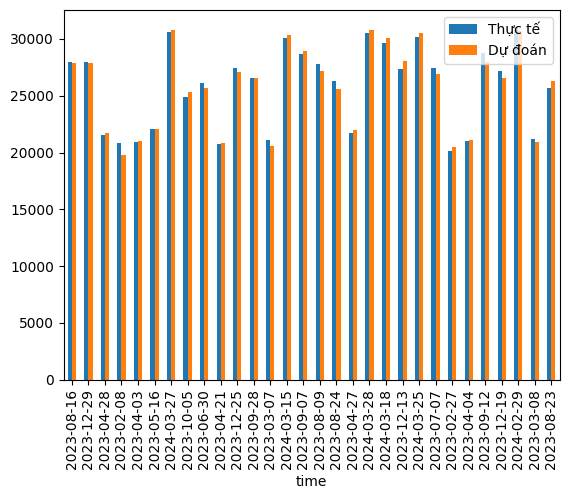

In [86]:
graph = data.tail(30)
graph.plot(kind='bar')